# Spotify Track Classifier and Recommendation System

### 1. **About the Dataset**

In [4]:
import pandas as pd 

In [5]:
df = pd.read_csv("spotify.csv")
df

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


#### The dataset contains multiple features related to spotify tracks: 
#### 1. track id: Spotify id for the track 
#### 2. Artist: Name of the artist
#### 3. album name: the album in which the track appears
#### 4. track name: name of the track 
#### 5. popularity: popularity of the track ranging from 0 to 100
#### 6. duration: length of the track in milliseconds 
#### 7. explicit: whether the track contains explicit lyrics 
#### 8. danceability: suitablity for dancing 
#### 9. energy: intensity and activity measure 
#### 10. key
#### 11. loudness
#### 12. mode: modality of the track 
#### 13. speechiness: presence of spoken words in the track 
#### 14. acoustiness: confidence measure of whether the track is acoustic 
#### 15. instrumentalness: likelihood that the track contains no vocal content 
#### 16. liveness: presence of audience in recording 
#### 17. valence: musical positiveness conveyed by the track 
#### 18. tempo
#### 19: time signature: A musical concept which means the estimated time signature of the track 
#### 20: track genre 

In [6]:
df.isnull().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

#### No null values!

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

### 2. **Exploratory Data Analysis**

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### **2.1: Univariate EDA**

#### **2.1.1: Numerical Features**

In [9]:
numerical_features = ['popularity', 'duration_ms', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

In [10]:
df[numerical_features].describe()

,popularity,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,33.238535,2.280292e+05,0.566800,0.641383,-8.258960,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837
std,22.305078,1.072977e+05,0.173542,0.251529,5.029337,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197
min,0.000000,0.000000e+00,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.740660e+05,0.456000,0.472000,-10.013000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750
50%,35.000000,2.129060e+05,0.580000,0.685000,-7.004000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000
75%,50.000000,2.615060e+05,0.695000,0.854000,-5.003000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000
max,100.000000,5.237295e+06,0.985000,1.000000,4.532000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000


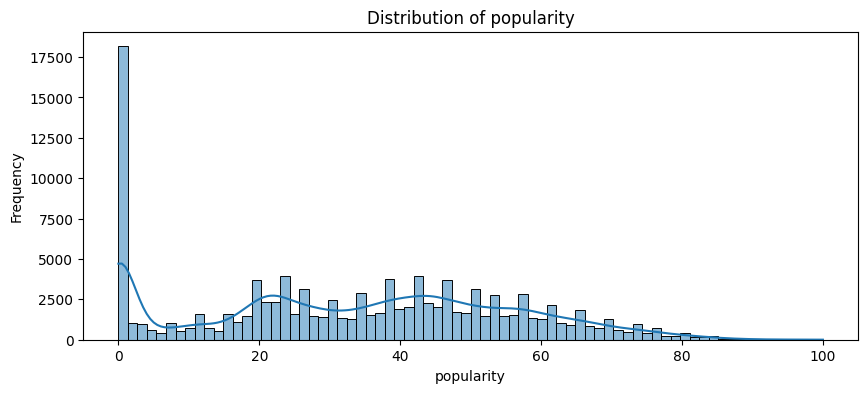

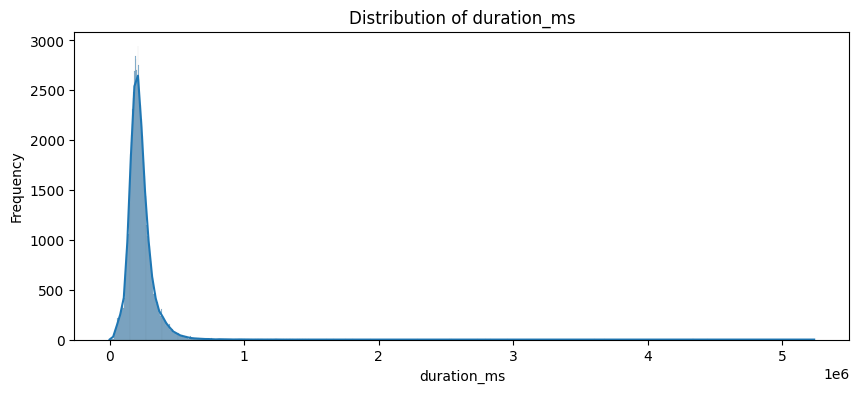

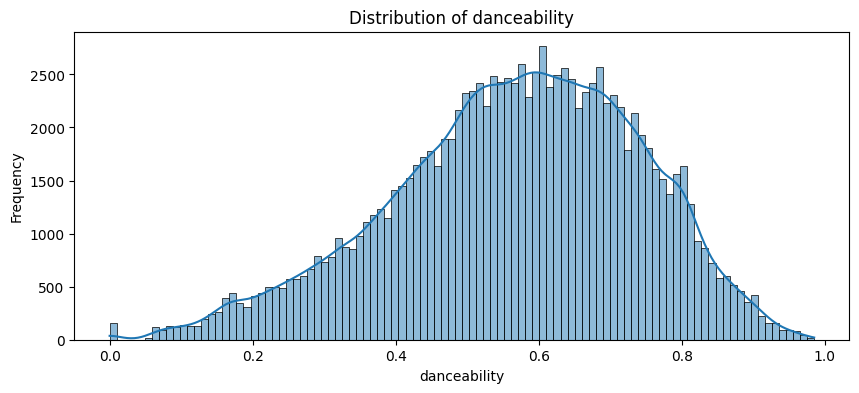

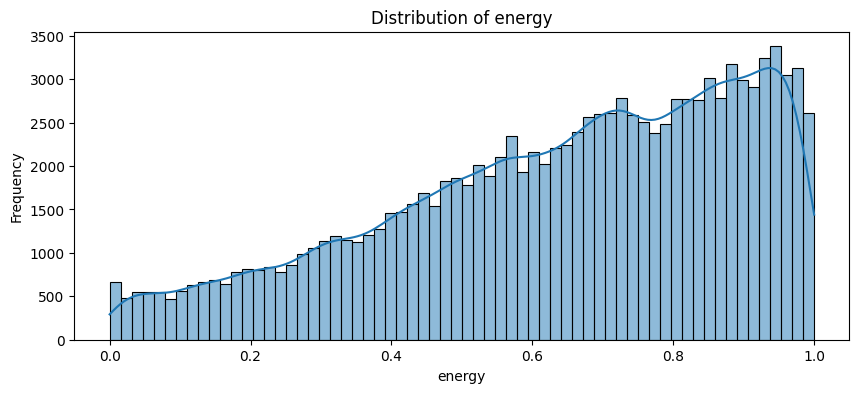

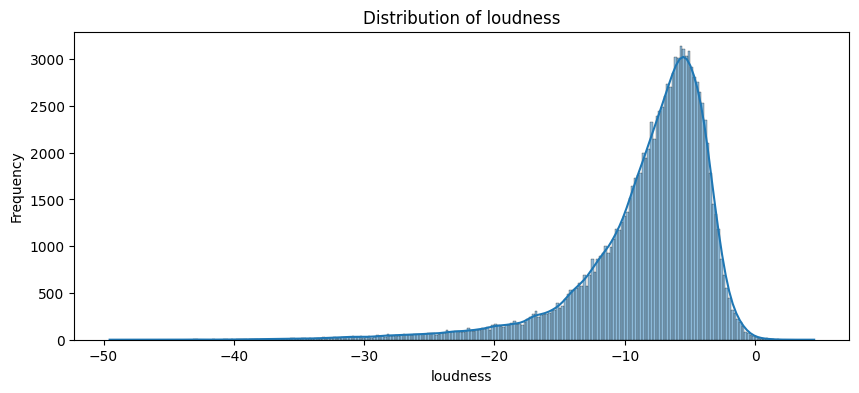

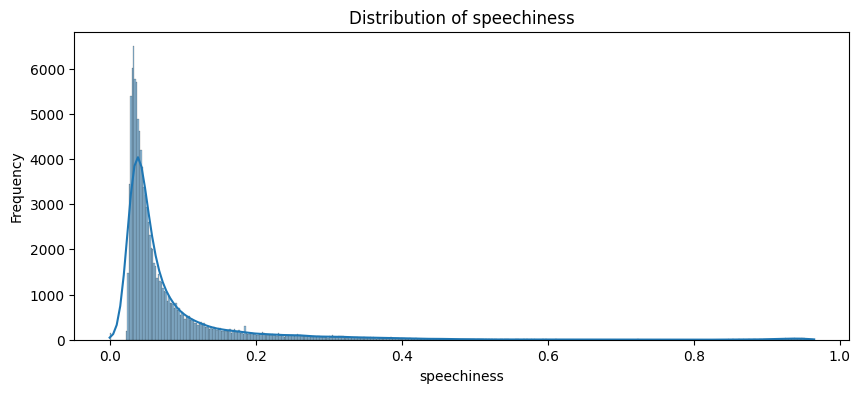

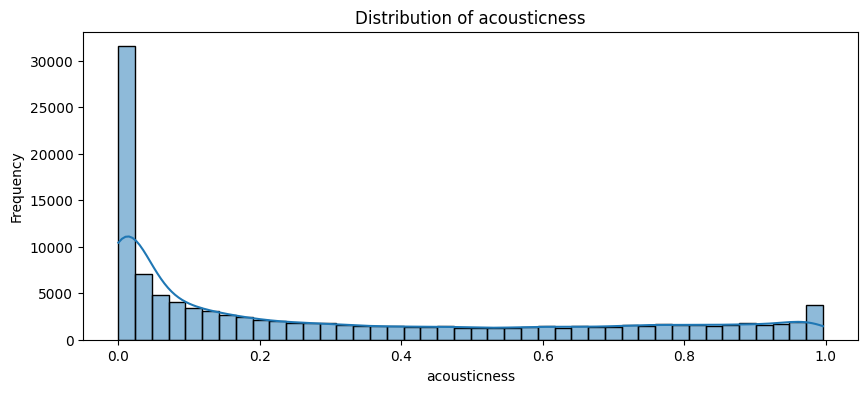

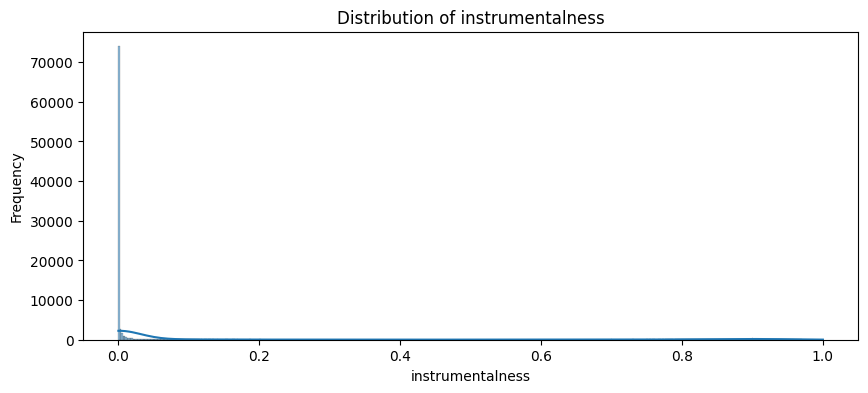

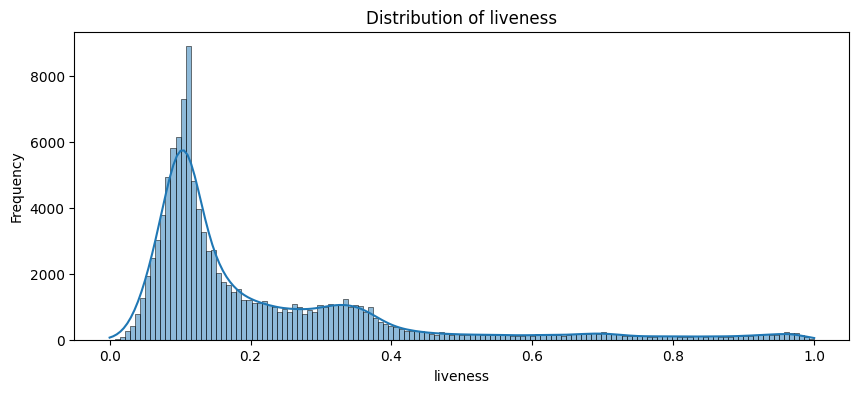

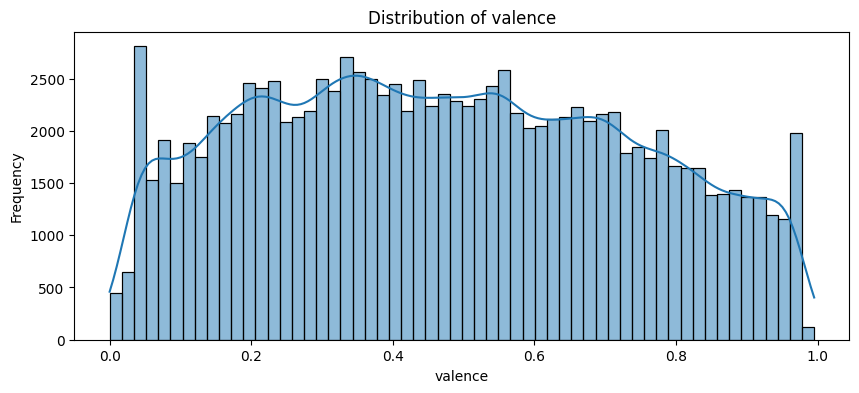

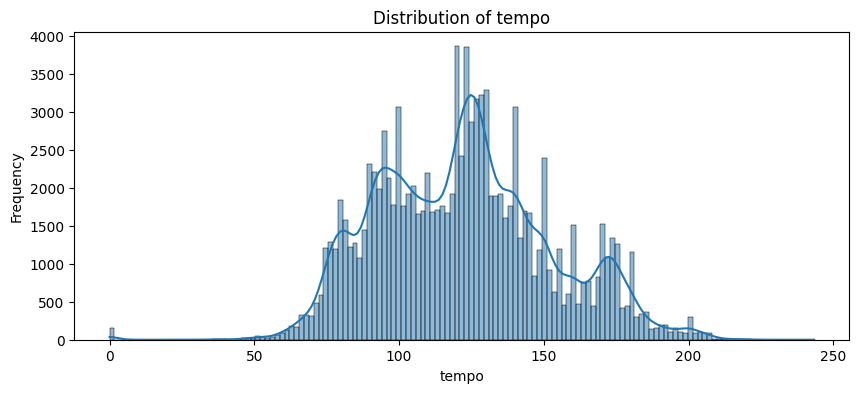

In [11]:
for feature in numerical_features:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

#### **2.1.2: Categorical Features**

In [12]:
categorical_features = ['explicit', 'mode', 'time_signature']

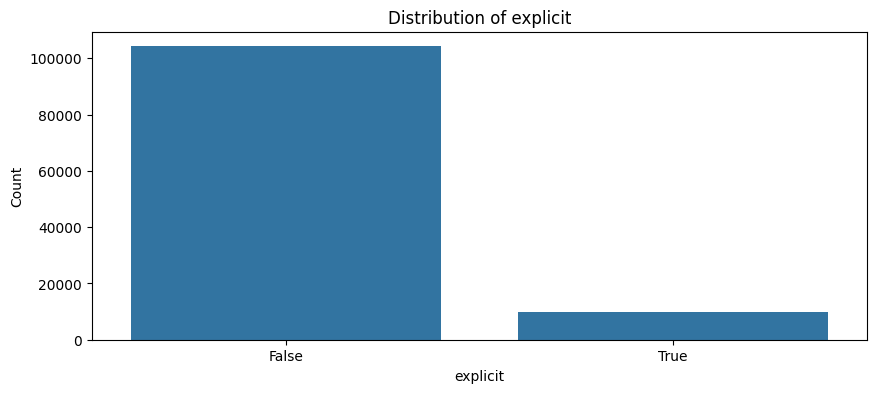

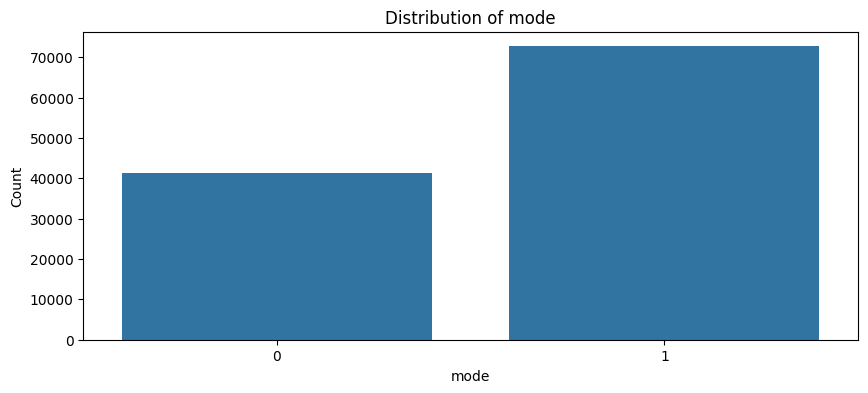

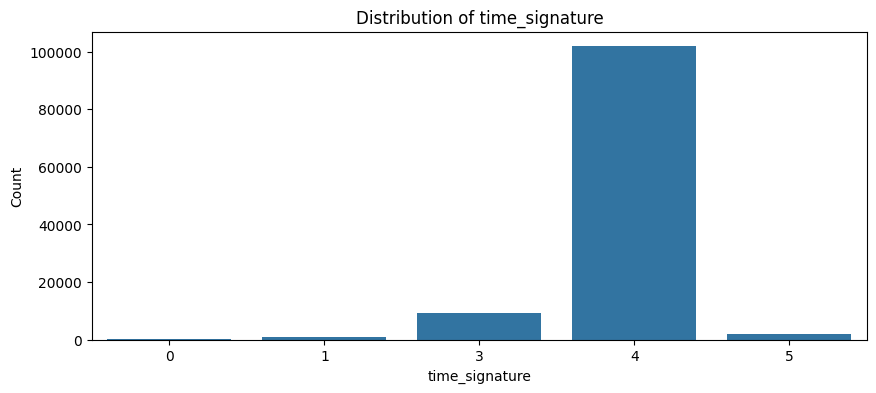

In [13]:
for feature in categorical_features:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=df[feature])
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')

#### **2.2: Bivariate EDA**

#### **2.2.1: Scatter Plots of Numerical Features against Popularity**

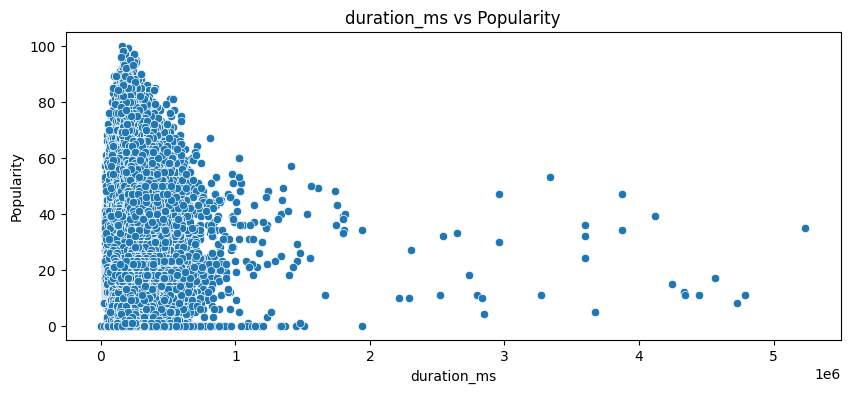

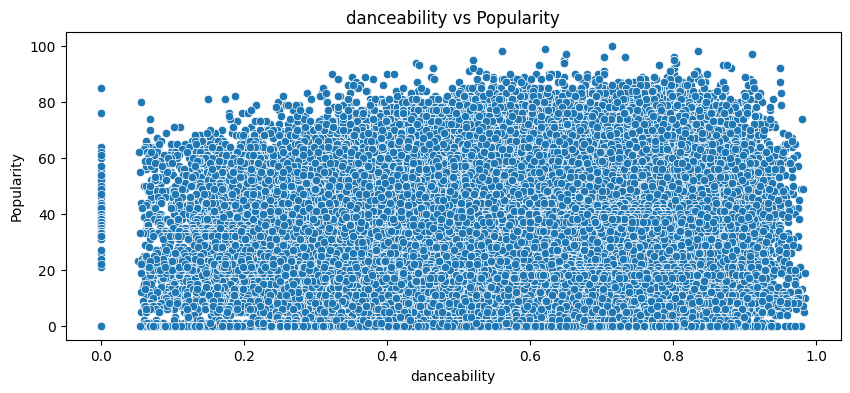

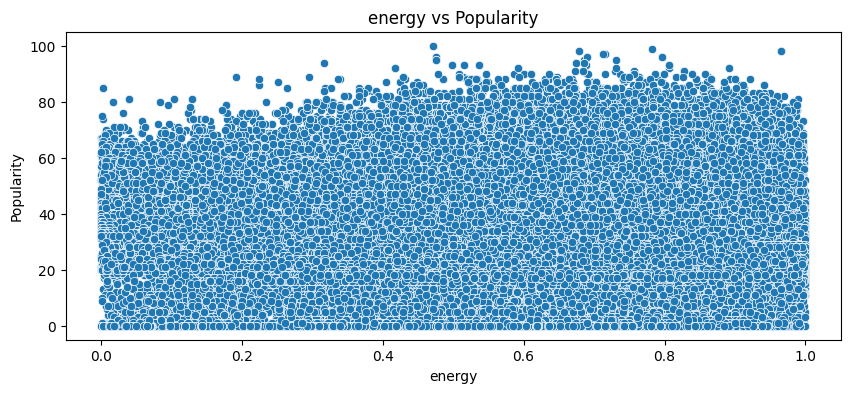

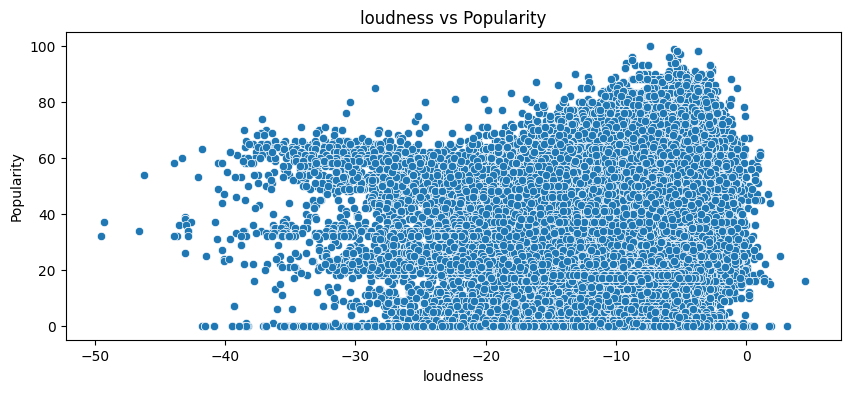

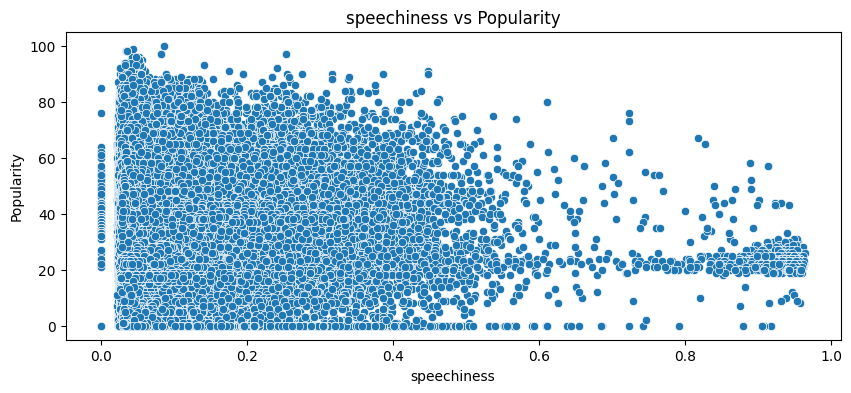

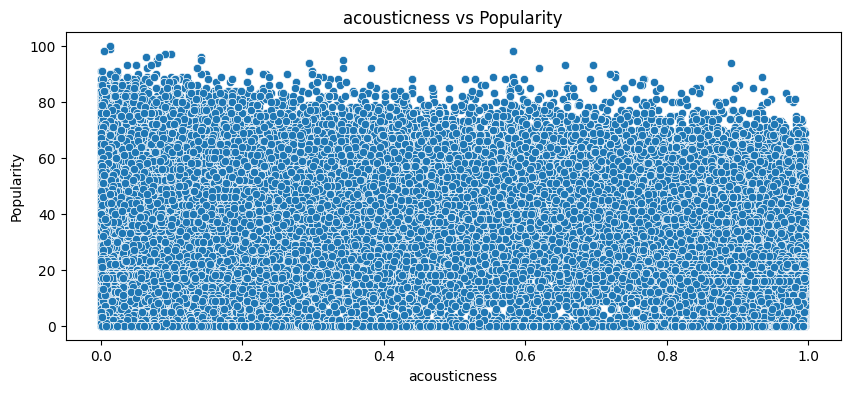

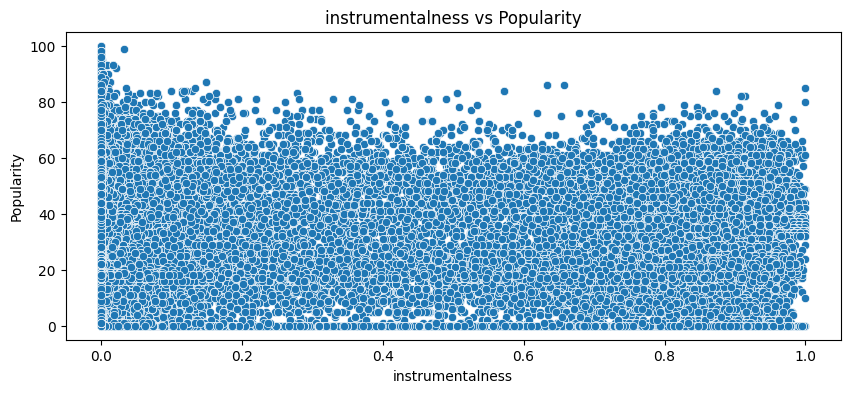

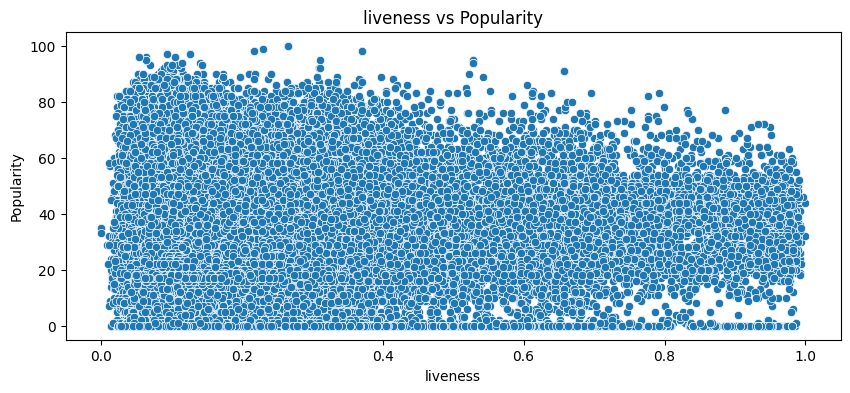

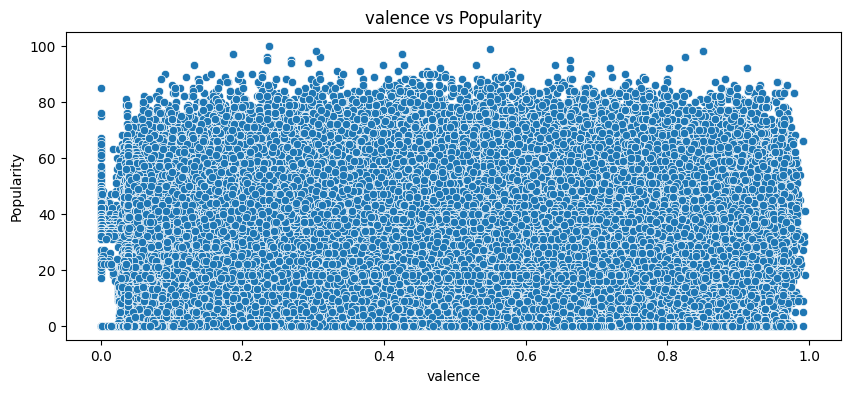

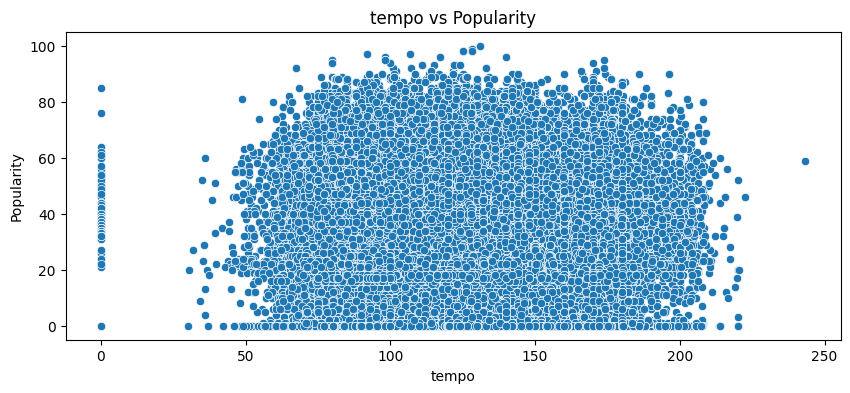

In [14]:
for feature in numerical_features:
    if feature != 'popularity':
        plt.figure(figsize=(10, 4))
        sns.scatterplot(x=df[feature], y=df['popularity'])
        plt.title(f'{feature} vs Popularity')
        plt.xlabel(feature)
        plt.ylabel('Popularity')

#### **2.2.2: Box plots of Numerical Features by Categorical Features**

/var/folders/cf/5k4xmsh15jg3966nv9jy7dkr0000gn/T/ipykernel_19122/2499303810.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 4))


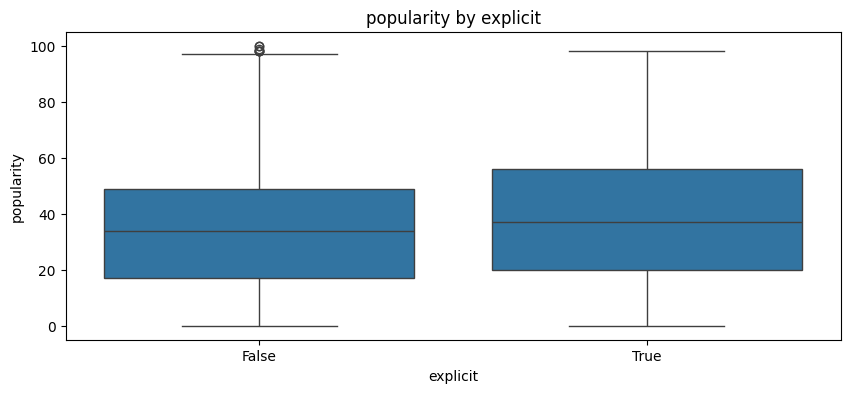

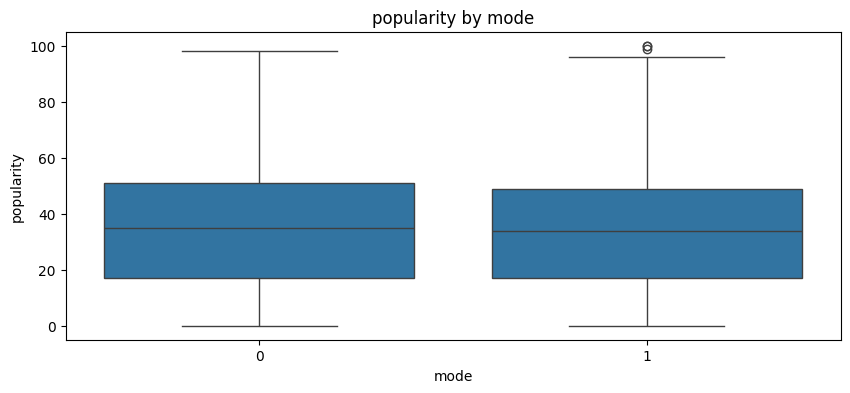

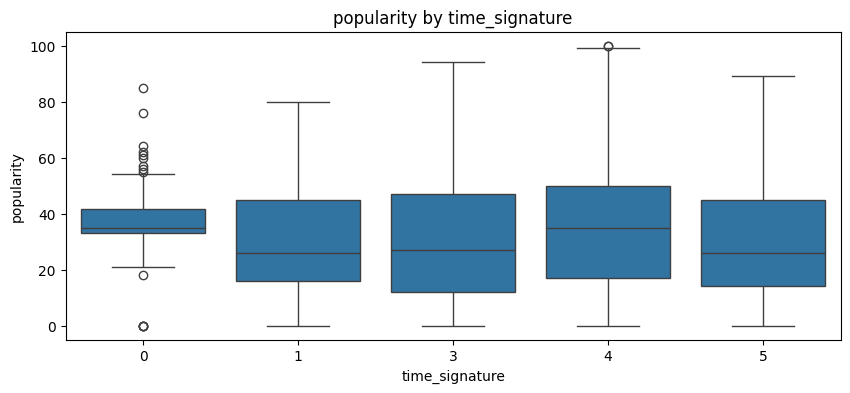

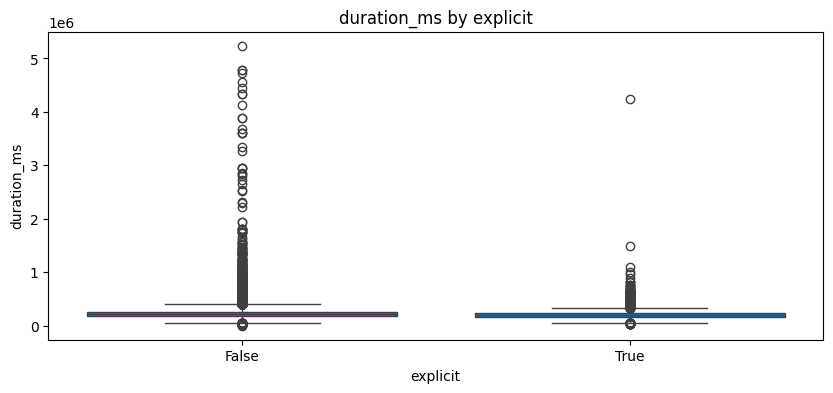

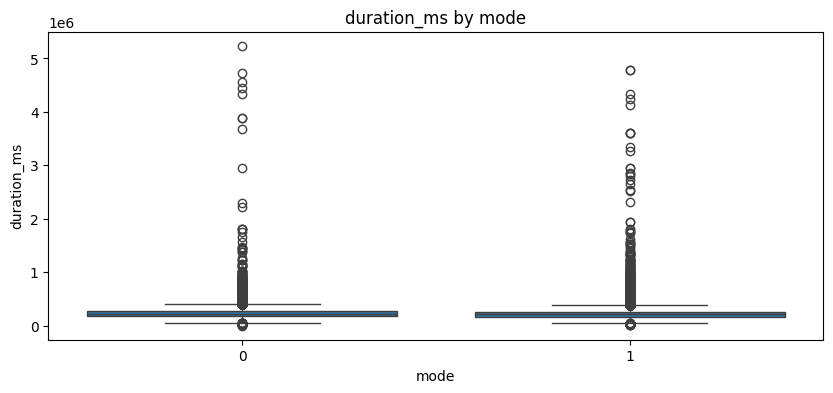

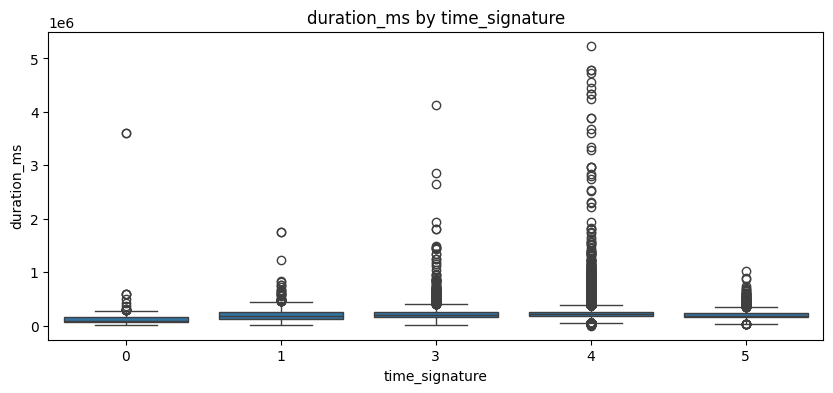

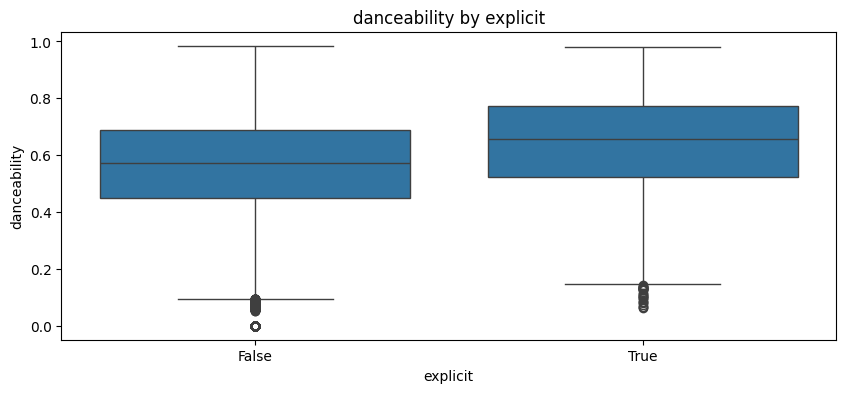

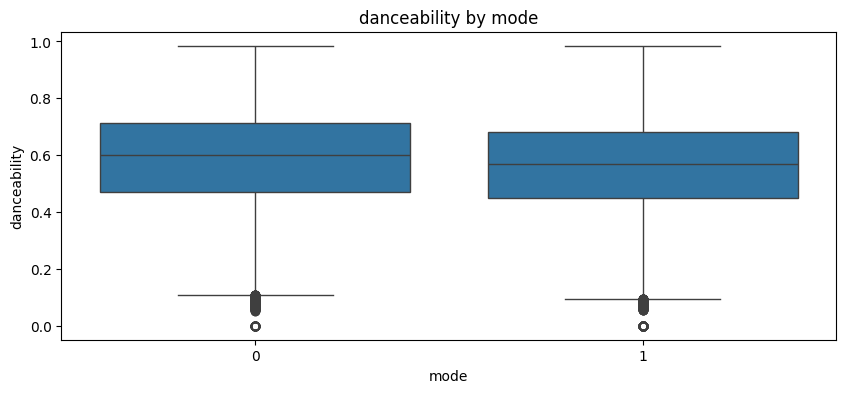

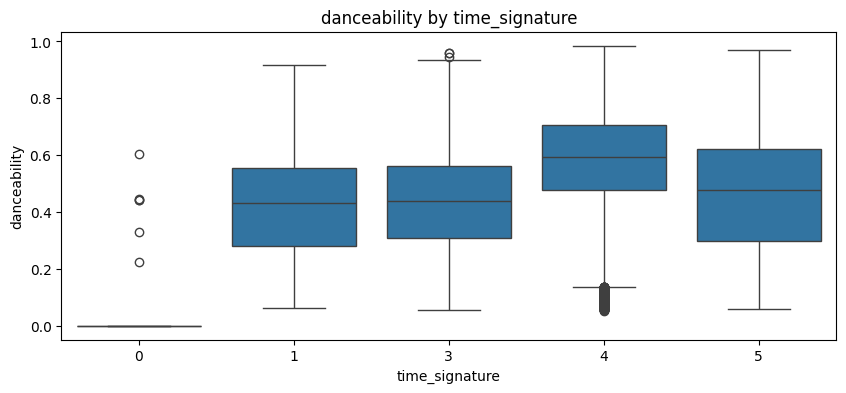

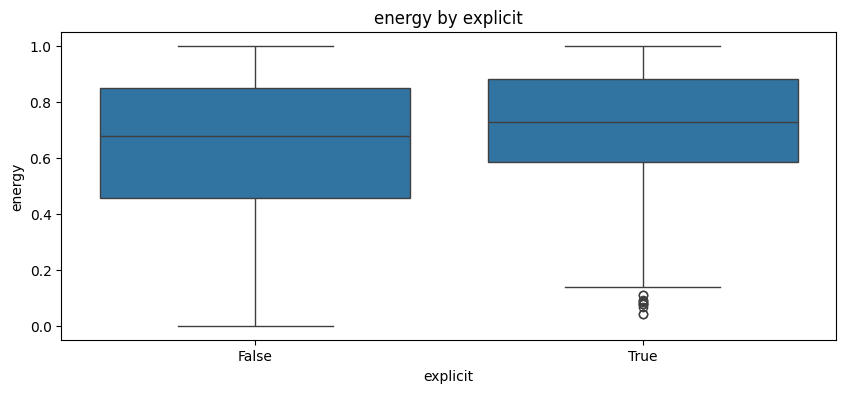

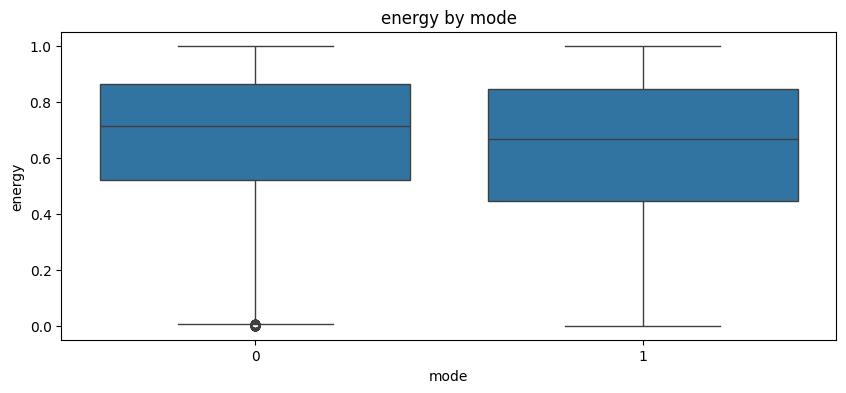

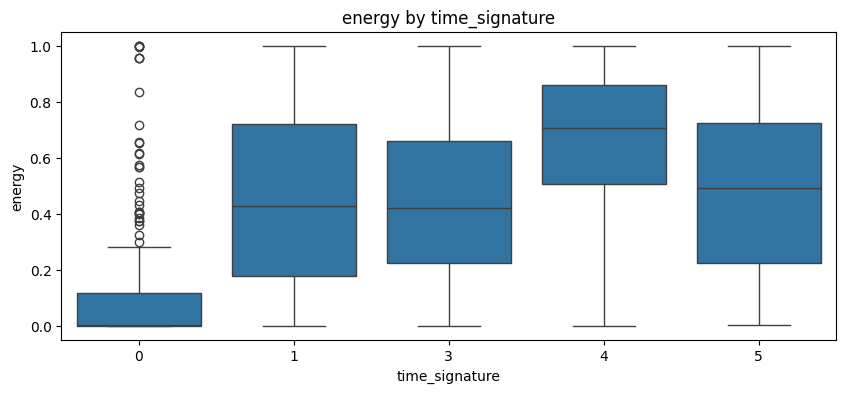

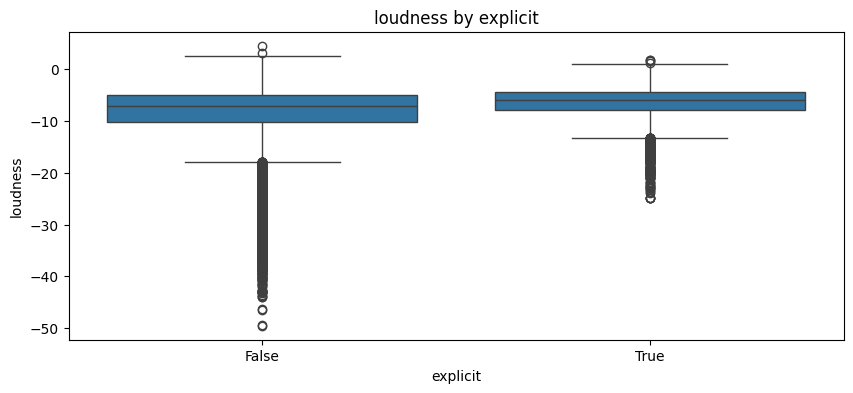

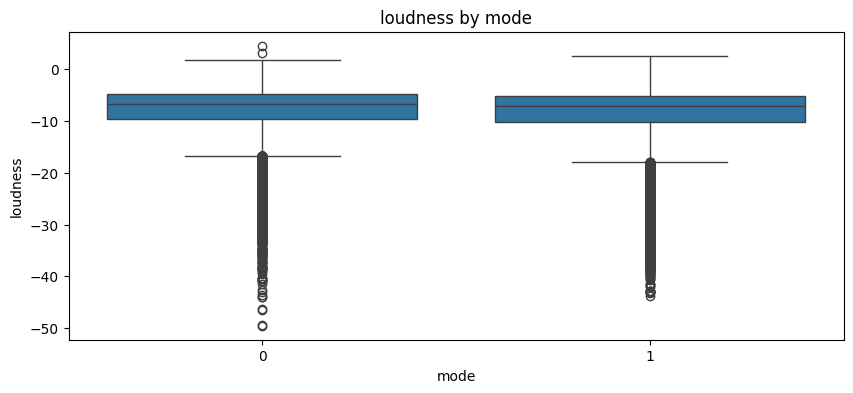

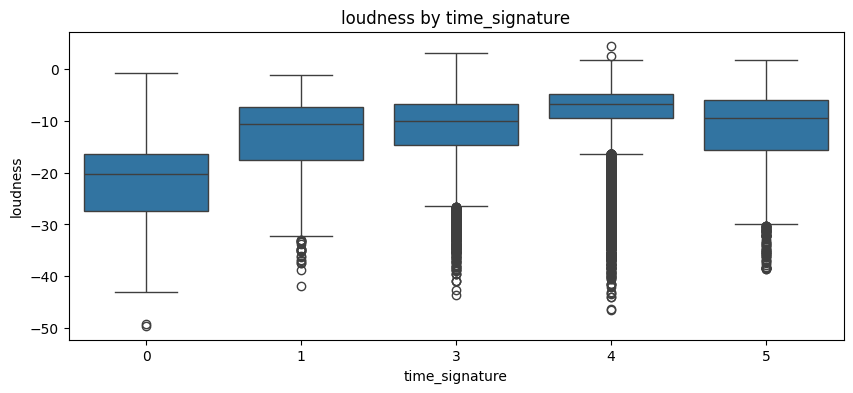

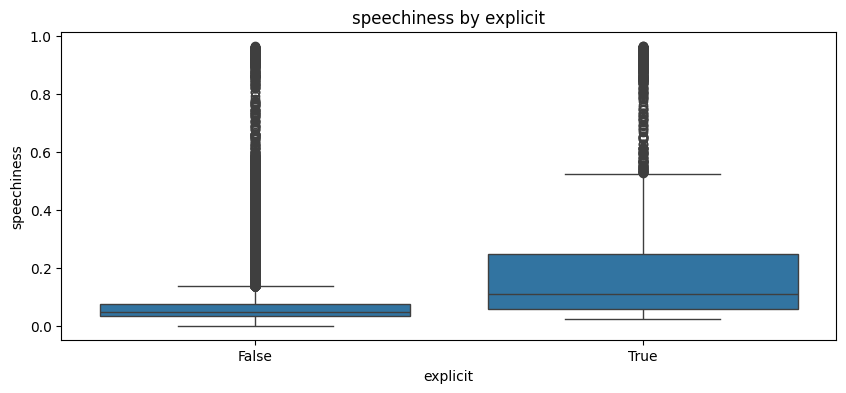

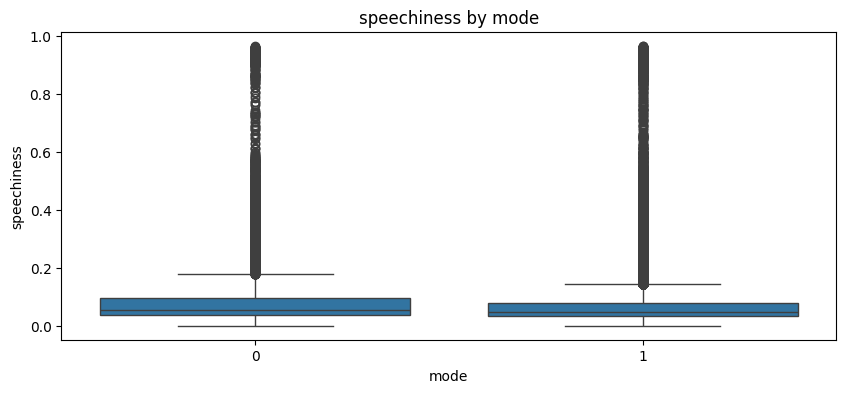

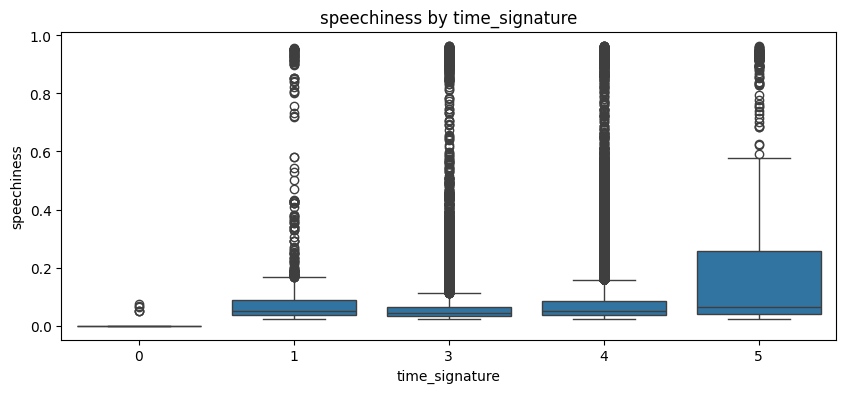

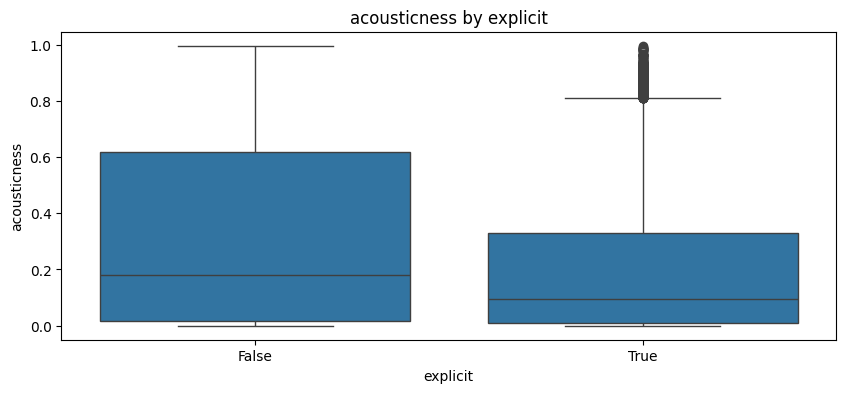

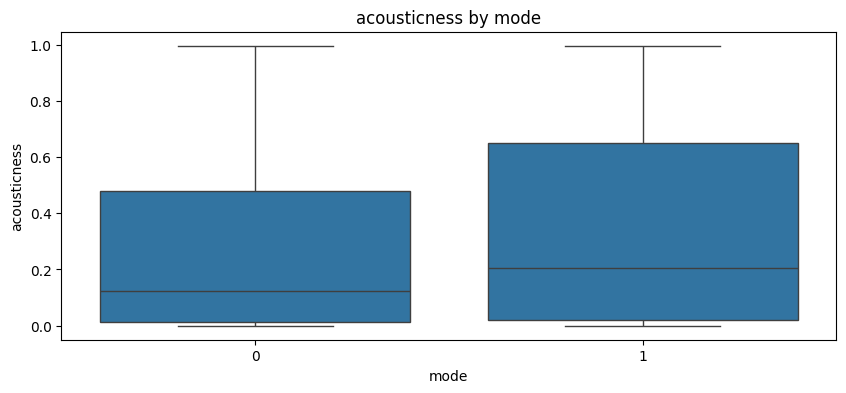

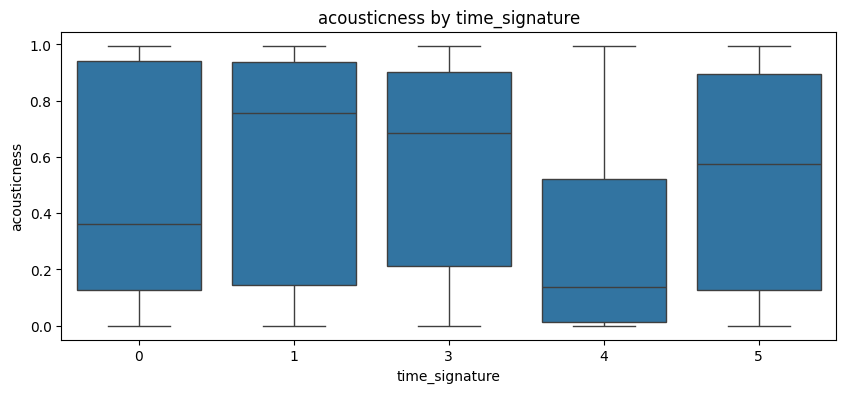

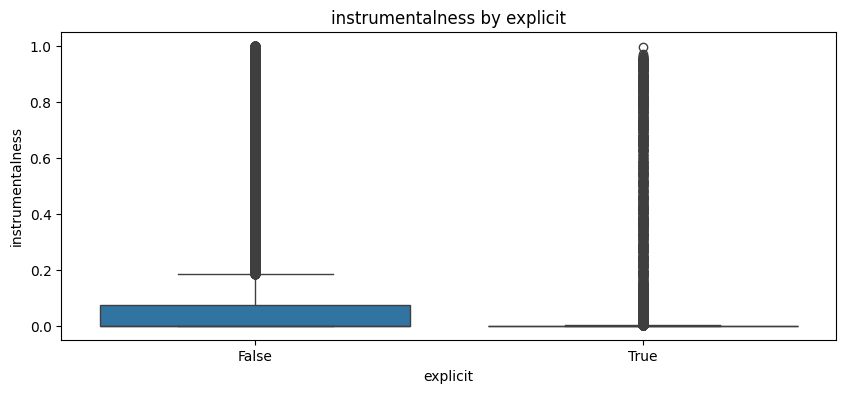

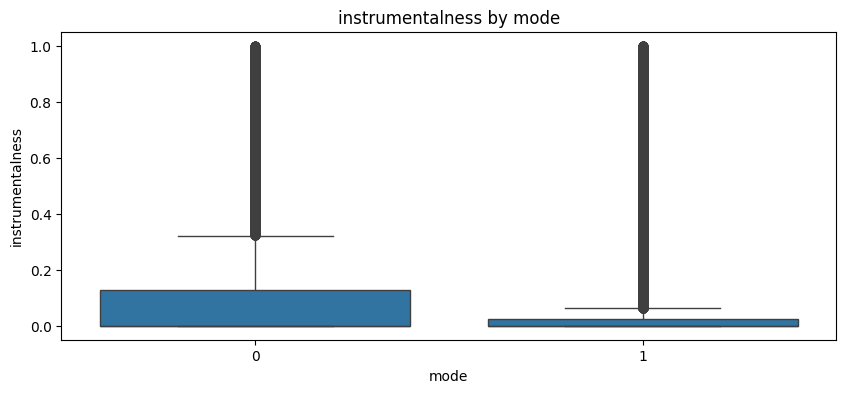

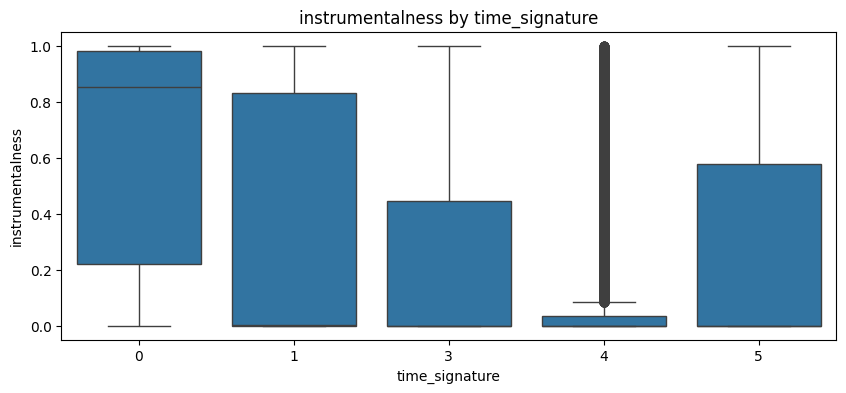

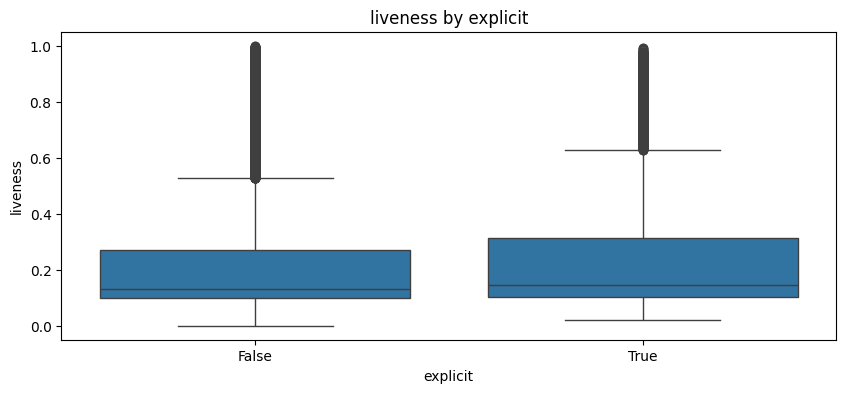

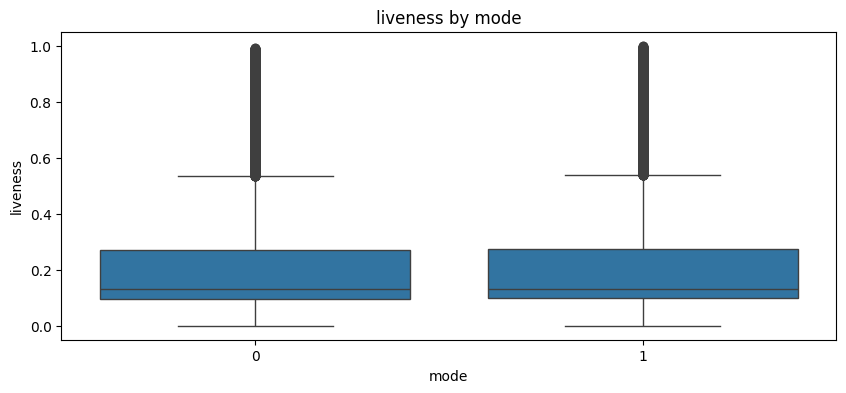

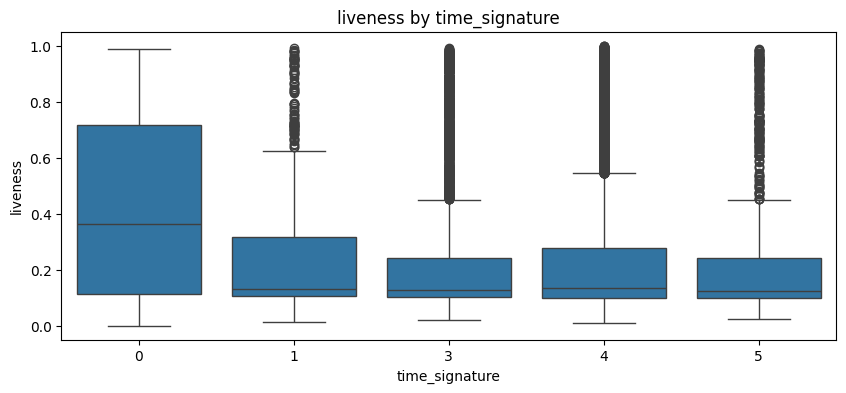

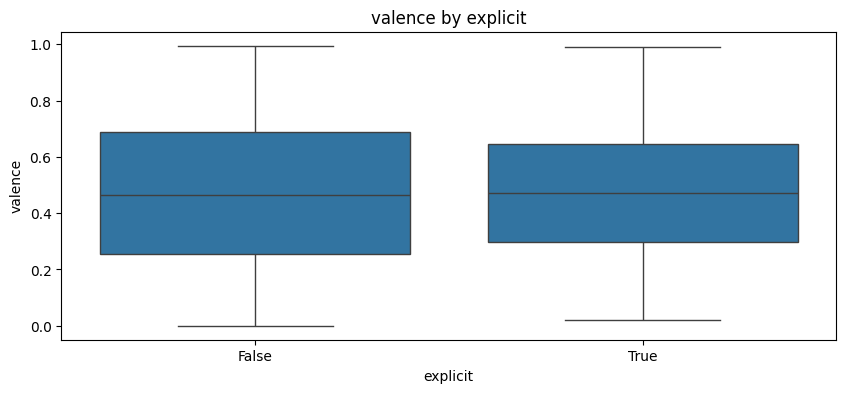

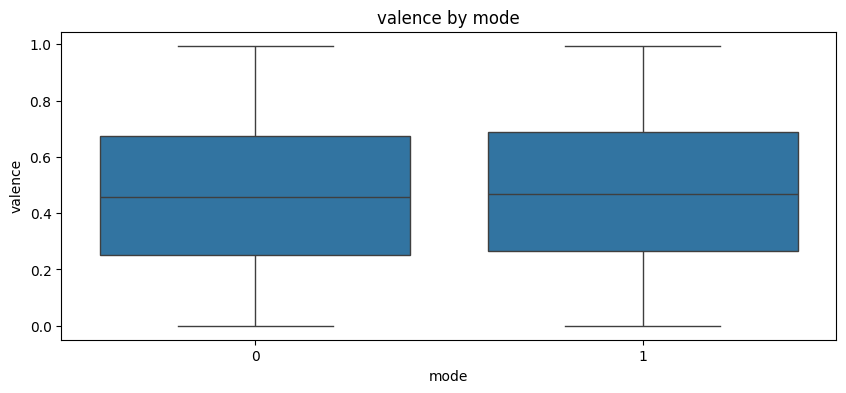

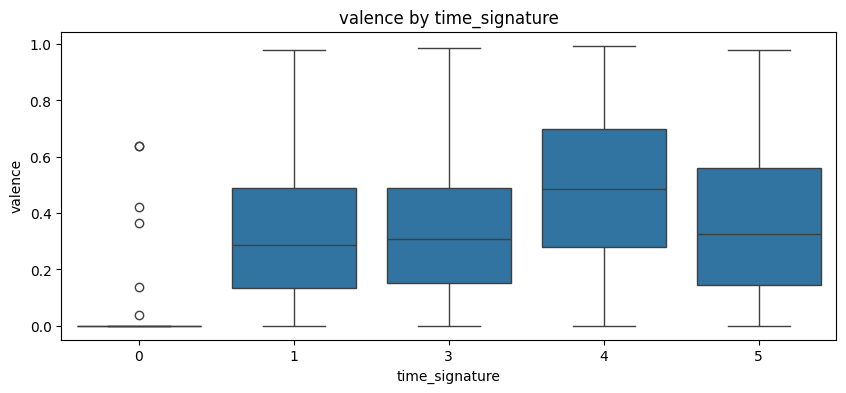

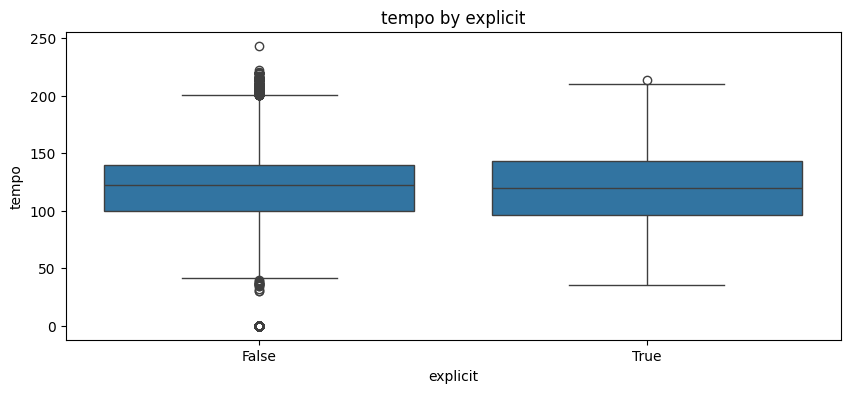

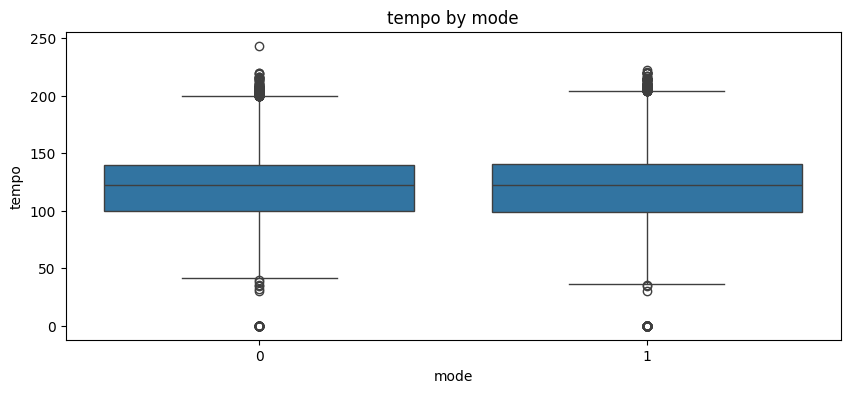

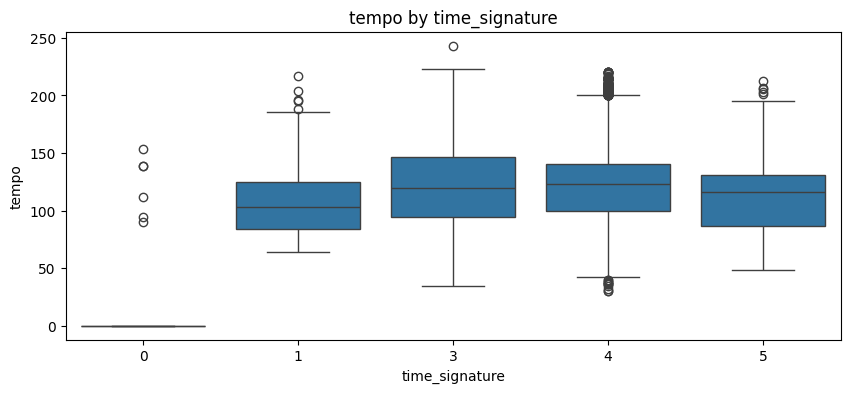

In [15]:
for feature in numerical_features:
    for cat_feature in categorical_features:
        plt.figure(figsize=(10, 4))
        sns.boxplot(x=df[cat_feature], y=df[feature])
        plt.title(f'{feature} by {cat_feature}')
        plt.xlabel(cat_feature)
        plt.ylabel(feature)

#### **3. Classification Based on Audio Features and Genre**

#### **3.1: Data Prepartion for Classification**

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [17]:
label_encoder = LabelEncoder()
df['track_genre'] = label_encoder.fit_transform(df['track_genre'])


In [18]:
features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

In [19]:
X = df[features]
y = df['track_genre']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### **3.2: Training the Classification Model**

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [22]:
model = RandomForestClassifier(n_estimators=40, random_state=15)
model.fit(X_train, y_train)


RandomForestClassifier(n_estimators=40, random_state=15)

In [23]:
y_pred = model.predict(X_test)

#### **3.3: Evaluating the Model**

In [24]:
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.22179824561403508


In [25]:
print('Classification Report:')
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Classification Report:
                   precision    recall  f1-score   support

         acoustic       0.11      0.11      0.11       213
         afrobeat       0.20      0.20      0.20       203
         alt-rock       0.03      0.02      0.02       215
      alternative       0.10      0.12      0.11       184
          ambient       0.20      0.21      0.21       197
            anime       0.12      0.09      0.10       193
      black-metal       0.33      0.37      0.35       210
        bluegrass       0.25      0.36      0.29       205
            blues       0.16      0.15      0.15       214
           brazil       0.01      0.02      0.01       197
        breakbeat       0.25      0.22      0.24       199
          british       0.12      0.07      0.09       214
         cantopop       0.16      0.21      0.18       193
    chicago-house       0.41      0.44      0.42       206
         children       0.30      0.29      0.30       214
            chill       0.10    

### **4. Building a Reccomendation System**

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

In [27]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df[features])

In [28]:
knn = NearestNeighbors(n_neighbors=6, metric='euclidean')
knn.fit(data_scaled)

NearestNeighbors(metric='euclidean', n_neighbors=6)

In [30]:
def get_recommendations(track_index, knn_model=knn, data_scaled=data_scaled, data=df, num_recommendations=5):
    distances, indices = knn_model.kneighbors([data_scaled[track_index]])
    track_indices = indices[0][1:num_recommendations+1]
    return data.iloc[track_indices][['track_name', 'artists', 'album_name', 'popularity']]

In [32]:
recommendations = get_recommendations(1)
recommendations

,track_name,artists,album_name,popularity
15190,Ghost - Acoustic,Ben Woodward,Ghost (Acoustic),55
76293,"Carmen, Act II: No.15 Quintette : Nous avons e...",Georges Bizet;Nicolas Rivenq;Michel Plasson;Wo...,Bizet : Carmen,26
93157,Под лаской плющевого пледа,Valentina Ponomaryova,Любимые песни.ru,27
108598,Viejo Ciego (feat. Antonio Agri & Esteban Morg...,Roberto Goyeneche;Antonio Agri;Esteban Morgado,Historia de Oro,19
93923,Моя душечка,Oleg Pogudin,Я сохраню слова любви,0
